<center>
    <h1>Algoritmos de Búsqueda</h1>
    <center><h5>Jiovaniel O. Soto González</h5></center>
    <center><h5>Juan C. Fontánez Castro</h5></center>
    <center><h5>Emmanuel A. Morales Martínez</h5></center>
</center>


# Propósito

- El objetivo de este experimento es realizar un análisis exhaustivo de diversos algoritmos de búsqueda en función de su eficiencia en diferentes entornos y situaciones. El propósito principal es demostrar cómo estos algoritmos se desempeñan en una variedad de contextos, lo que incluye evaluar su velocidad, precisión y capacidad para encontrar soluciones óptimas o cercanas a la óptima. Este estudio busca proporcionar una comprensión más profunda de las fortalezas y limitaciones de cada algoritmo de búsqueda.

# Hipótesis

- Se espera que el algoritmo de búsqueda en anchura sobresalga debido a su capacidad para explorar todos los nodos de un mismo nivel antes de avanzar al siguiente nivel, lo que puede llevar a la identificación rápida de soluciones óptimas o cercanas a la óptima en ciertos escenarios.

# Conceptos e información recopilada

- Para los conceptos e información se buscaron recursos para definir los conceptos de algoritmos de búsqueda, incluyendo lo estudiado en clase.

- - Búsqueda en Anchura (BFS) - Recorre los nodos de un grafo, eligiendo algún nodo como elemento, para luego explorar todos los vecinos de este nodo.[1]

- - Búsqueda en Profundidad (DFS) - Recorre los nodos de un grafo, desde el nodo padre hacia el nodo hijo.[1]

- - Algoritmo “A*” - Busca el camino más corto desde un estado inicial al estado meta a través de un espacio de problema, usando una heurística óptima[2]

- - Algoritmo “Hill Climbing” - Sigue la dirección de ascenso/descenso más empinada a partir de su posición.[3]

- - Punto - Es una figura geométrica dimensional: no tiene longitud, area y volumen.[4]

- - Vértice - Punto de una figura geométrica donde se unen dos o más elementos unidimensionales.[5]

- - Plano - Representación gráfica de un objeto o área en una superficie bidimensional.[6]

- - Polígono - Figura geométrica plana, compuesta por un conjunto de segmentos de recta conectados de manera tal que encierren y delimitan una región del plano, generalmente sin cruzarse una línea con otra.[7]

- - Linea recta - Sucesión indefinida y continua de puntos.[8]

# ¿Cómo se configuró el experimento?

#### C)

- Para el primer problema, se configuró un entorno similar al presentado en el texto del curso en el cual se definieron varios polígonos en un plano de dos dimensiones con un punto de partida y un punto de meta, con la intención de que los algoritmos de búsqueda evitaran los obstáculos obteniento el recorrido más eficiente según sus parámetros.

In [5]:
# Start and goal points
start = (33, 107)
goal = (292, 3)

# Define polygonal obstacles as lists of vertices
polygon1 = [(35, 90), (104, 90), (104, 120), (35, 120)]
polygon2 = [(59, 5), (82, 45), (63, 94), (32, 82), (26, 45)]
polygon3 = [(96, 36), (111, 78), (83, 78)]
polygon4 = [(135, 62), (165, 86), (145, 106)]
polygon5 = [(135, 3), (149, 20), (103, 42), (103, 7)]
polygon6 = [(197, 8), (197, 67), (157, 67), (157, 8)]
polygon7 = [(204, 56), (218, 68), (218, 87), (199, 95), (181, 83), (181, 68)]
polygon8 = [(221, 8), (229, 20), (225, 78), (203, 16)]
polygons = [polygon1, polygon2, polygon3, polygon4, polygon5, polygon6, polygon7, polygon8]

- Luego, se configuraron las siguientes funciones las cuales tienen como propósito verificar si el punto al cual se quiere navegar se encuentra dentro de uno de los obstáculos encontrados en el entorno.

In [32]:
import heapq
import time
from collections import deque

def is_point_in_obstacle(point, polygon_vertices):
    x, y = point
    n = len(polygon_vertices)
    inside = False
    p1x, p1y = polygon_vertices[0]
    for i in range(n + 1):
        p2x, p2y = polygon_vertices[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xinters:
                        inside = not inside
        p1x, p1y = p2x, p2y
    return inside

def get_valid_neighbors(pos, polygons):
    x, y = pos
    neighbors = [(x+1, y), (x-1, y), (x, y+1), (x, y-1), (x+1, y+1), (x-1, y+1), (x+1, y-1), (x-1, y-1)]
    valid_neighbors = []
    for neighbor in neighbors:
        if all(not is_point_in_obstacle(neighbor, polygon) for polygon in polygons):
            valid_neighbors.append(neighbor)
    return valid_neighbors

- Adicional a esto, se configuró una función heurística. La misma se encarga de estimar el costo (o distancia) restante desde un estado dado hasta su objetivo, lo cual ayuda con algoritmos cómo el de A* a explorar puntos que parezcan estar más cercanos al punto de meta en el entorno.

In [33]:
import math

def heuristic(vertex1, vertex2):
    
    return math.sqrt((vertex2[0] - vertex1[0])**2 + (vertex2[1] - vertex1[1])**2)

#### D)

- Para la primera evaluación, se empleó el algoritmo de búsqueda en anchura (BFS), reconocido por su capacidad para encontrar la ruta más corta hacia el objetivo. Esta elección se basa en la eficacia de BFS para explorar sistemáticamente todas las posibles rutas desde el estado inicial hasta el objetivo, nivel por nivel, garantizando así que la primera solución encontrada sea la más corta. La selección de BFS para esta evaluación se justifica por su capacidad para encontrar la mejor ruta disponible y su idoneidad para problemas donde el objetivo es minimizar la cantidad de pasos o costos necesarios para alcanzar una solución. Al utilizar BFS, se espera obtener una solución óptima y completa en el menor tiempo posible, lo que permite comparar el rendimiento de otros algoritmos con esta referencia de calidad. Adicional a esto, cada algoritmo de búsqueda ejecutado cuenta con una función que genera una imagen mostrando el entorno y el camino seleccionado por el algoritmo pertinente.

### BFS

Shortest Path: [(33, 107), (33, 108), (33, 109), (33, 110), (33, 111), (33, 112), (33, 113), (33, 114), (33, 115), (33, 116), (33, 117), (33, 118), (34, 119), (35, 120), (36, 121), (37, 121), (38, 121), (39, 121), (40, 121), (41, 121), (42, 121), (43, 121), (44, 121), (45, 121), (46, 121), (47, 121), (48, 121), (49, 121), (50, 121), (51, 121), (52, 121), (53, 121), (54, 121), (55, 121), (56, 121), (57, 121), (58, 121), (59, 121), (60, 121), (61, 121), (62, 121), (63, 121), (64, 121), (65, 121), (66, 121), (67, 121), (68, 121), (69, 121), (70, 121), (71, 121), (72, 121), (73, 121), (74, 121), (75, 121), (76, 121), (77, 121), (78, 121), (79, 121), (80, 121), (81, 121), (82, 121), (83, 121), (84, 121), (85, 121), (86, 121), (87, 121), (88, 121), (89, 121), (90, 121), (91, 121), (92, 121), (93, 121), (94, 121), (95, 121), (96, 121), (97, 121), (98, 121), (99, 121), (100, 121), (101, 121), (102, 121), (103, 121), (104, 121), (105, 121), (106, 121), (107, 121), (108, 121), (109, 121), (110, 

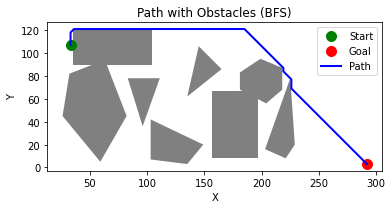

In [49]:
def bfs(start, goal, polygons):
    queue = deque([start])
    visited = set([start])
    came_from = {}

    while queue:
        current = queue.popleft()

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        for neighbor in get_valid_neighbors(current, polygons):
            if neighbor not in visited:
                queue.append(neighbor)
                visited.add(neighbor)
                came_from[neighbor] = current

    return None  # No path found

def plot_path_with_obstacles(polygons, start, goal, path):
    fig, ax = plt.subplots()

    # Plot polygons
    for polygon in polygons:
        poly = Polygon(polygon, facecolor='gray')
        ax.add_patch(poly)

    # Plot start and goal points
    ax.plot(start[0], start[1], 'go', markersize=10, label='Start')
    ax.plot(goal[0], goal[1], 'ro', markersize=10, label='Goal')

    # Plot path
    path_x, path_y = zip(*path)
    ax.plot(path_x, path_y, 'b-', linewidth=2, label='Path')

    ax.set_aspect('equal', 'box')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Path with Obstacles (BFS)')
    ax.legend()
    plt.show()

if __name__ == "__main__":
    polygons = [polygon1, polygon2, polygon3, polygon4, polygon5, polygon6, polygon7, polygon8]
    start = (33, 107)
    goal = (292, 3)

    start_time = time.time()
    path = bfs(start, goal, polygons)
    end_time = time.time()

    if path:
        print("Shortest Path:", path)
        print("Time taken:", end_time - start_time, "seconds")

        # Plot the path with obstacles
        plot_path_with_obstacles(polygons, start, goal, path)
    else:
        print("No path found")

- Para la segunda evaluación, se decidió utilizar el algoritmo de búsqueda local, comúnmente conocido como “Hill Climbing”. A diferencia de otros algoritmos que garantizan encontrar la mejor solución, como A* o BFS, Hill Climbing no ofrece esa garantía. En cambio, busca mejorar continuamente la solución actual al moverse a estados vecinos que mejoren el valor de la función objetivo, ascendiendo “colinas” en el espacio de búsqueda. La elección de Hill Climbing para esta evaluación se basa en la intención de observar las diferencias en la calidad de las soluciones obtenidas en comparación con los otros algoritmos. Dado que Hill Climbing puede quedar atrapado en óptimos locales y no siempre alcanza la solución óptima global, nos permite explorar cómo la falta de garantías afecta la calidad de las soluciones en diferentes problemas.

### Hill Climbing

Path found: [(33, 107), (34, 106), (35, 105), (35, 104), (35, 103), (35, 102), (35, 101), (35, 100), (35, 99), (35, 98), (35, 97), (35, 96), (35, 95), (35, 94), (35, 93), (35, 92), (35, 91), (36, 90), (37, 89), (38, 88), (39, 87), (40, 86), (41, 86), (42, 86), (43, 87), (44, 87), (45, 88), (46, 88), (47, 88), (48, 89), (49, 89), (50, 89), (51, 90), (52, 90)]
Time taken: 0.004915952682495117 seconds


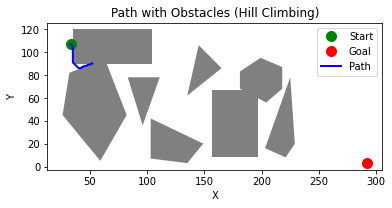

In [13]:
def hill_climbing(start, goal, polygons):
    """
    Hill climbing algorithm to find a path from start to goal.
    """
    current = start
    path = [current]

    while current != goal:
        neighbors = get_valid_neighbors(current, polygons)
        if not neighbors:
            return None  # No path found
        next_neighbor = min(neighbors, key=lambda x: heuristic(x, goal))
        if heuristic(next_neighbor, goal) >= heuristic(current, goal):
            return path  # Closest neighbor is not closer to the goal
        current = next_neighbor
        path.append(current)

    return path

def plot_path_with_obstacles(polygons, start, goal, path):
    fig, ax = plt.subplots()

    # Plot polygons
    for polygon in polygons:
        poly = Polygon(polygon, facecolor='gray')
        ax.add_patch(poly)

    # Plot start and goal points
    ax.plot(start[0], start[1], 'go', markersize=10, label='Start')
    ax.plot(goal[0], goal[1], 'ro', markersize=10, label='Goal')

    # Plot path
    path_x, path_y = zip(*path)
    ax.plot(path_x, path_y, 'b-', linewidth=2, label='Path')

    ax.set_aspect('equal', 'box')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Path with Obstacles (Hill Climbing)')
    ax.legend()
    plt.show()

if __name__ == "__main__":
    polygons = [polygon1, polygon2, polygon3, polygon4, polygon5, polygon6, polygon7, polygon8]

    # Define start and goal points (scaled down)
    start = (33, 107)
    goal = (292, 3)

    start_time = time.time()
    path = hill_climbing(start, goal, polygons)
    end_time = time.time()

    if path:
        print("Path found:", path)
        print("Time taken:", end_time - start_time, "seconds")
        
        
        
        # Plot the path with obstacles
        plot_path_with_obstacles(polygons, start, goal, path)
    else:
        print("No path found")

- En la última evaluación, se empleó el algoritmo A*, una técnica de búsqueda informada que combina los beneficios de la búsqueda en anchura y la búsqueda heurística. A diferencia de la búsqueda en anchura, que explora todas las posibles rutas de manera exhaustiva, A* utiliza una función heurística para guiar la búsqueda hacia las áreas más prometedoras del espacio de búsqueda.

- La elección de A* se basa en su capacidad para encontrar soluciones óptimas y eficientes en términos de tiempo y memoria. Al evaluar A*, se puede observar cómo la combinación de búsqueda exhaustiva y heurística influye en la calidad y el rendimiento de las soluciones obtenidas en comparación con otros enfoques.

### A*

Shortest Path: [(33, 107), (34, 108), (34, 109), (35, 110), (35, 111), (35, 112), (35, 113), (35, 114), (35, 115), (35, 116), (35, 117), (35, 118), (35, 119), (35, 120), (36, 121), (37, 121), (38, 121), (39, 121), (40, 121), (41, 121), (42, 121), (43, 121), (44, 121), (45, 121), (46, 121), (47, 121), (48, 121), (49, 121), (50, 121), (51, 121), (52, 121), (53, 121), (54, 121), (55, 121), (56, 121), (57, 121), (58, 121), (59, 121), (60, 121), (61, 121), (62, 121), (63, 121), (64, 121), (65, 121), (66, 121), (67, 121), (68, 121), (69, 121), (70, 121), (71, 121), (72, 121), (73, 121), (74, 121), (75, 121), (76, 121), (77, 121), (78, 121), (79, 121), (80, 121), (81, 121), (82, 121), (83, 121), (84, 121), (85, 121), (86, 121), (87, 121), (88, 121), (89, 121), (90, 121), (91, 121), (92, 121), (93, 121), (94, 121), (95, 121), (96, 121), (97, 121), (98, 121), (99, 121), (100, 121), (101, 121), (102, 121), (103, 121), (104, 121), (105, 120), (106, 119), (107, 118), (108, 117), (109, 116), (110, 

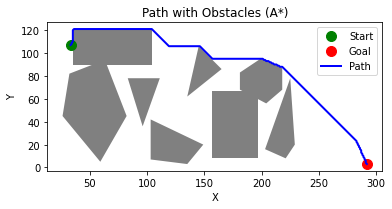

In [9]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def astar(start, goal, polygons):
    
    open_list = [(0, start)]
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_list:
        current_f, current = heapq.heappop(open_list)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        for neighbor in get_valid_neighbors(current, polygons):
            tentative_g = g_score[current] + heuristic(current, neighbor)

            if neighbor not in g_score or tentative_g < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                f_score[neighbor] = tentative_g + heuristic(neighbor, goal)
                heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None  # No path found
def plot_path_with_obstacles(polygons, start, goal, path):
    fig, ax = plt.subplots()

    # Plot polygons
    for polygon in polygons:
        poly = Polygon(polygon, facecolor='gray')
        ax.add_patch(poly)

    # Plot start and goal points
    ax.plot(start[0], start[1], 'go', markersize=10, label='Start')
    ax.plot(goal[0], goal[1], 'ro', markersize=10, label='Goal')

    # Plot path
    path_x, path_y = zip(*path)
    ax.plot(path_x, path_y, 'b-', linewidth=2, label='Path')

    ax.set_aspect('equal', 'box')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Path with Obstacles (A*)')
    ax.legend()
    plt.show()

if __name__ == "__main__":
    polygons = [polygon1, polygon2, polygon3, polygon4, polygon5, polygon6, polygon7, polygon8]
    start = (33, 107)
    goal = (292, 3)

    start_time = time.time()
    path = astar(start, goal, polygons)
    end_time = time.time()

    if path:
        print("Shortest Path:", path)
        print("\nTime taken:", end_time - start_time, "seconds")

        # Plot the path with obstacles
        plot_path_with_obstacles(polygons, start, goal, path)
    else:
        print("No path found")

### Segundo entorno

- El segundo entorno a evaluarse consta de tres triángulos ubicados uno al lado del otro de izquierda a derecha. Los algoritmos a evaluarse son los mismos utilizados para el primer entorno. 

In [21]:
# Define polygonal obstacles as lists of vertices
triangle1 = [(10, 10), (40, 40), (25, 40)]
triangle2 = [(45, 40), (70, 10), (55, 10)] 
triangle3 = [(75, 10), (100, 40), (85, 40)]
polygons = [triangle1, triangle2, triangle3]

start = (15, 25)
goal = (95, 25)

### Hill Climbing

Path found: [(15, 25), (16, 25), (17, 25), (18, 26)]
Time taken: 0.0008711814880371094 seconds


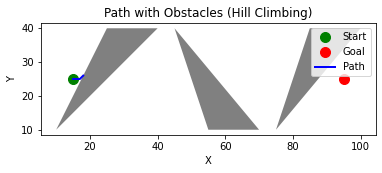

In [27]:
def hill_climbing(start, goal, polygons):
    """
    Hill climbing algorithm to find a path from start to goal.
    """
    current = start
    path = [current]

    while current != goal:
        neighbors = get_valid_neighbors(current, polygons)
        if not neighbors:
            return None  # No path found
        next_neighbor = min(neighbors, key=lambda x: heuristic(x, goal))
        if heuristic(next_neighbor, goal) >= heuristic(current, goal):
            return path  # Closest neighbor is not closer to the goal
        current = next_neighbor
        path.append(current)

    return path

def plot_path_with_obstacles(polygons, start, goal, path):
    fig, ax = plt.subplots()

    # Plot polygons
    for polygon in polygons:
        poly = Polygon(polygon, facecolor='gray')
        ax.add_patch(poly)

    # Plot start and goal points
    ax.plot(start[0], start[1], 'go', markersize=10, label='Start')
    ax.plot(goal[0], goal[1], 'ro', markersize=10, label='Goal')

    # Plot path
    path_x, path_y = zip(*path)
    ax.plot(path_x, path_y, 'b-', linewidth=2, label='Path')

    ax.set_aspect('equal', 'box')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Path with Obstacles (Hill Climbing)')
    ax.legend()
    plt.show()

if __name__ == "__main__":
    polygons = [triangle1, triangle2, triangle3]

    # Define start and goal points (scaled down)
    start = (15, 25)
    goal = (95, 25)

    start_time = time.time()
    path = hill_climbing(start, goal, polygons)
    end_time = time.time()

    if path:
        print("Path found:", path)
        print("Time taken:", end_time - start_time, "seconds")
        
        
        
        # Plot the path with obstacles
        plot_path_with_obstacles(polygons, start, goal, path)
    else:
        print("No path found")

### BFS

Shortest Path: [(15, 25), (15, 26), (15, 27), (15, 28), (15, 29), (15, 30), (16, 31), (17, 32), (18, 33), (19, 34), (20, 35), (21, 36), (22, 37), (23, 38), (24, 39), (25, 40), (26, 41), (27, 41), (28, 41), (29, 41), (30, 41), (31, 41), (32, 41), (33, 41), (34, 41), (35, 41), (36, 41), (37, 41), (38, 41), (39, 41), (40, 41), (41, 41), (42, 41), (43, 41), (44, 41), (45, 41), (46, 41), (47, 41), (48, 41), (49, 40), (50, 39), (51, 38), (52, 37), (53, 36), (54, 35), (55, 34), (56, 33), (57, 32), (58, 31), (59, 30), (60, 29), (61, 28), (62, 27), (63, 26), (64, 25), (65, 24), (66, 23), (67, 22), (68, 21), (69, 20), (70, 19), (71, 18), (72, 17), (73, 16), (74, 15), (75, 14), (76, 13), (77, 12), (78, 12), (79, 12), (80, 12), (81, 12), (82, 12), (83, 13), (84, 14), (85, 15), (86, 16), (87, 17), (88, 18), (89, 19), (90, 20), (91, 21), (92, 22), (93, 23), (94, 24), (95, 25)]
Time taken: 1.0481767654418945 seconds


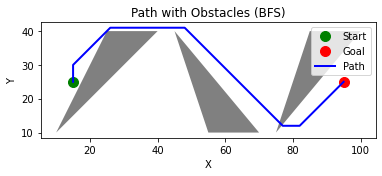

In [31]:
def bfs(start, goal, polygons):
    queue = deque([start])
    visited = set([start])
    came_from = {}

    while queue:
        current = queue.popleft()

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        for neighbor in get_valid_neighbors(current, polygons):
            if neighbor not in visited:
                queue.append(neighbor)
                visited.add(neighbor)
                came_from[neighbor] = current

    return None  # No path found

def plot_path_with_obstacles(polygons, start, goal, path):
    fig, ax = plt.subplots()

    # Plot polygons
    for polygon in polygons:
        poly = Polygon(polygon, facecolor='gray')
        ax.add_patch(poly)

    # Plot start and goal points
    ax.plot(start[0], start[1], 'go', markersize=10, label='Start')
    ax.plot(goal[0], goal[1], 'ro', markersize=10, label='Goal')

    # Plot path
    path_x, path_y = zip(*path)
    ax.plot(path_x, path_y, 'b-', linewidth=2, label='Path')

    ax.set_aspect('equal', 'box')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Path with Obstacles (BFS)')
    ax.legend()
    plt.show()

if __name__ == "__main__":
    polygons = [triangle1, triangle2, triangle3]
    start = (15, 25)
    goal = (95, 25)

    start_time = time.time()
    path = bfs(start, goal, polygons)
    end_time = time.time()

    if path:
        print("Shortest Path:", path)
        print("Time taken:", end_time - start_time, "seconds")

        # Plot the path with obstacles
        plot_path_with_obstacles(polygons, start, goal, path)
    else:
        print("No path found")

### A*

Shortest Path: [(15, 25), (15, 24), (15, 23), (15, 22), (14, 21), (13, 20), (12, 19), (12, 18), (12, 17), (12, 16), (12, 15), (12, 14), (11, 13), (11, 12), (12, 11), (13, 11), (14, 11), (15, 11), (16, 11), (17, 11), (18, 11), (19, 11), (20, 11), (21, 11), (22, 11), (23, 11), (24, 11), (25, 11), (26, 11), (27, 11), (28, 11), (29, 11), (30, 11), (31, 11), (32, 11), (33, 11), (34, 11), (35, 11), (36, 11), (37, 11), (38, 11), (39, 11), (40, 11), (41, 11), (42, 11), (43, 11), (44, 11), (45, 11), (46, 11), (47, 11), (48, 11), (49, 11), (50, 11), (51, 11), (52, 11), (53, 11), (54, 11), (55, 10), (56, 10), (57, 10), (58, 10), (59, 10), (60, 10), (61, 10), (62, 10), (63, 10), (64, 10), (65, 10), (66, 10), (67, 10), (68, 10), (69, 10), (70, 11), (71, 11), (72, 11), (73, 11), (74, 11), (75, 11), (76, 11), (77, 12), (78, 13), (79, 14), (80, 15), (81, 16), (82, 17), (83, 18), (84, 19), (85, 20), (86, 21), (87, 21), (88, 22), (89, 22), (90, 23), (91, 23), (92, 24), (93, 24), (94, 24), (95, 25)]

Tim

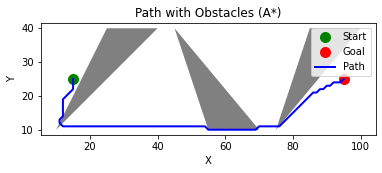

In [25]:
def astar(start, goal, polygons):
    
    open_list = [(0, start)]
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_list:
        current_f, current = heapq.heappop(open_list)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        for neighbor in get_valid_neighbors(current, polygons):
            tentative_g = g_score[current] + heuristic(current, neighbor)

            if neighbor not in g_score or tentative_g < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                f_score[neighbor] = tentative_g + heuristic(neighbor, goal)
                heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None  # No path found
def plot_path_with_obstacles(polygons, start, goal, path):
    fig, ax = plt.subplots()

    # Plot polygons
    for polygon in polygons:
        poly = Polygon(polygon, facecolor='gray')
        ax.add_patch(poly)

    # Plot start and goal points
    ax.plot(start[0], start[1], 'go', markersize=10, label='Start')
    ax.plot(goal[0], goal[1], 'ro', markersize=10, label='Goal')

    # Plot path
    path_x, path_y = zip(*path)
    ax.plot(path_x, path_y, 'b-', linewidth=2, label='Path')

    ax.set_aspect('equal', 'box')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Path with Obstacles (A*)')
    ax.legend()
    plt.show()

if __name__ == "__main__":
    polygons = [triangle1, triangle2, triangle3]
    start = (15, 25)
    goal = (95, 25)

    start_time = time.time()
    path = astar(start, goal, polygons)
    end_time = time.time()

    if path:
        print("Shortest Path:", path)
        print("\nTime taken:", end_time - start_time, "seconds")

        # Plot the path with obstacles
        plot_path_with_obstacles(polygons, start, goal, path)
    else:
        print("No path found")

### Segundo problema

- El problema 3.9 del libro de texto de la clase presenta un problema en el cual 3 misioneros y 3 caníbales se encuentran en un lado del río y el objetivo es que todos terminen en el lado opuesto del río utilizando un bote en el cual solo caben dos personas al mismo tiempo y evitando que la cantidad de caníbales sea mayor a la de los misioneros en ninguno de los dos extremos del río. Para este tipo de problemas es posible utilizar dos tipos de algorítmos de búsqueda que resulten ser eficientes, la búsqueda en anchura (en inglés BFS - Breadth First Search) y búsqueda en profundidad (en inglés DFS o Depth First Search) y ambos serán evaluados con el propósito de determinar cual encuentra la mejor solución.

### Código de misioneros y caníbales

#### BFS

- El algoritmo consta de una clase de estado, en la cual se definen los cambios de estado en el entorno y una función de sucesores que utiliza la clase de estado para realizar los cambios. Adicional a esto, verifica los estados repetidos para asegurar una solución más eficiente, evitando estados visitados anteriormente. Finalmente, se implementa el algoritmo de búsqueda correspondiente, en este caso, búsqueda en anchura.

In [44]:
from collections import deque

# Breadth First Search Solution

class State:
    def __init__(self, cannibal_left, missionary_left, boat, cannibal_right, missionary_right):
        self.cannibal_left = cannibal_left
        self.missionary_left = missionary_left
        self.boat = boat
        self.cannibal_right = cannibal_right
        self.missionary_right = missionary_right
        self.parent = None

    def is_valid(self):
        if self.missionary_left >= 0 and self.missionary_right >= 0 \
           and self.cannibal_left >= 0 and self.cannibal_right >= 0 \
           and (self.missionary_left == 0 or self.missionary_left >= self.cannibal_left) \
           and (self.missionary_right == 0 or self.missionary_right >= self.cannibal_right):
            return True
        else:
            return False

    def is_goal(self):
        return self.cannibal_left == 0 and self.missionary_left == 0

    def __eq__(self, other):
        return self.cannibal_left == other.cannibal_left and \
               self.missionary_left == other.missionary_left and \
               self.boat == other.boat and \
               self.cannibal_right == other.cannibal_right and \
               self.missionary_right == other.missionary_right

    def __hash__(self):
        return hash((self.cannibal_left, self.missionary_left, self.boat, self.cannibal_right, self.missionary_right))

def successors(state):
    children = []
    if state.boat == 'left':
        new_state = State(state.cannibal_left, state.missionary_left - 2, 'right',
                          state.cannibal_right, state.missionary_right + 2)
        # Two missionaries cross left to right
        if new_state.is_valid():
            new_state.parent = state
            children.append(new_state)
        new_state = State(state.cannibal_left - 2, state.missionary_left, 'right',
                          state.cannibal_right + 2, state.missionary_right)
        # Two cannibals cross left to right
        if new_state.is_valid():
            new_state.parent = state
            children.append(new_state)
        new_state = State(state.cannibal_left - 1, state.missionary_left - 1, 'right',
                          state.cannibal_right + 1, state.missionary_right + 1)
        # One missionary and one cannibal cross left to right
        if new_state.is_valid():
            new_state.parent = state
            children.append(new_state)
        new_state = State(state.cannibal_left, state.missionary_left - 1, 'right',
                          state.cannibal_right, state.missionary_right + 1)
        # One missionary crosses left to right
        if new_state.is_valid():
            new_state.parent = state
            children.append(new_state)
        new_state = State(state.cannibal_left - 1, state.missionary_left, 'right',
                          state.cannibal_right + 1, state.missionary_right)
        # One cannibal crosses left to right
        if new_state.is_valid():
            new_state.parent = state
            children.append(new_state)
    else:
        new_state = State(state.cannibal_left, state.missionary_left + 2, 'left',
                          state.cannibal_right, state.missionary_right - 2)
        # Two missionaries cross right to left
        if new_state.is_valid():
            new_state.parent = state
            children.append(new_state)
        new_state = State(state.cannibal_left + 2, state.missionary_left, 'left',
                          state.cannibal_right - 2, state.missionary_right)
        # Two cannibals cross right to left
        if new_state.is_valid():
            new_state.parent = state
            children.append(new_state)
        new_state = State(state.cannibal_left + 1, state.missionary_left + 1, 'left',
                          state.cannibal_right - 1, state.missionary_right - 1)
        # One missionary and one cannibal cross right to left
        if new_state.is_valid():
            new_state.parent = state
            children.append(new_state)
        new_state = State(state.cannibal_left, state.missionary_left + 1, 'left',
                          state.cannibal_right, state.missionary_right - 1)
        # One missionary crosses right to left
        if new_state.is_valid():
            new_state.parent = state
            children.append(new_state)
        new_state = State(state.cannibal_left + 1, state.missionary_left, 'left',
                          state.cannibal_right - 1, state.missionary_right)
        # One cannibal crosses right to left
        if new_state.is_valid():
            new_state.parent = state
            children.append(new_state)
    return children

from collections import deque

# Breadth First Search Solution

class State:
    def __init__(self, cannibal_left, missionary_left, boat, cannibal_right, missionary_right):
        self.cannibal_left = cannibal_left
        self.missionary_left = missionary_left
        self.boat = boat
        self.cannibal_right = cannibal_right
        self.missionary_right = missionary_right
        self.parent = None

    def is_valid(self):
        if self.missionary_left >= 0 and self.missionary_right >= 0 \
           and self.cannibal_left >= 0 and self.cannibal_right >= 0 \
           and (self.missionary_left == 0 or self.missionary_left >= self.cannibal_left) \
           and (self.missionary_right == 0 or self.missionary_right >= self.cannibal_right):
            return True
        else:
            return False

    def is_goal(self):
        return self.cannibal_left == 0 and self.missionary_left == 0

    def __eq__(self, other):
        return self.cannibal_left == other.cannibal_left and \
               self.missionary_left == other.missionary_left and \
               self.boat == other.boat and \
               self.cannibal_right == other.cannibal_right and \
               self.missionary_right == other.missionary_right

    def __hash__(self):
        return hash((self.cannibal_left, self.missionary_left, self.boat, self.cannibal_right, self.missionary_right))

def successors(state):
    children = []
    if state.boat == 'left':
        new_state = State(state.cannibal_left, state.missionary_left - 2, 'right',
                          state.cannibal_right, state.missionary_right + 2)
        # Two missionaries cross left to right
        if new_state.is_valid():
            new_state.parent = state
            children.append(new_state)
        new_state = State(state.cannibal_left - 2, state.missionary_left, 'right',
                          state.cannibal_right + 2, state.missionary_right)
        # Two cannibals cross left to right
        if new_state.is_valid():
            new_state.parent = state
            children.append(new_state)
        new_state = State(state.cannibal_left - 1, state.missionary_left - 1, 'right',
                          state.cannibal_right + 1, state.missionary_right + 1)
        # One missionary and one cannibal cross left to right
        if new_state.is_valid():
            new_state.parent = state
            children.append(new_state)
        new_state = State(state.cannibal_left, state.missionary_left - 1, 'right',
                          state.cannibal_right, state.missionary_right + 1)
        # One missionary crosses left to right
        if new_state.is_valid():
            new_state.parent = state
            children.append(new_state)
        new_state = State(state.cannibal_left - 1, state.missionary_left, 'right',
                          state.cannibal_right + 1, state.missionary_right)
        # One cannibal crosses left to right
        if new_state.is_valid():
            new_state.parent = state
            children.append(new_state)
    else:
        new_state = State(state.cannibal_left, state.missionary_left + 2, 'left',
                          state.cannibal_right, state.missionary_right - 2)
        # Two missionaries cross right to left
        if new_state.is_valid():
            new_state.parent = state
            children.append(new_state)
        new_state = State(state.cannibal_left + 2, state.missionary_left, 'left',
                          state.cannibal_right - 2, state.missionary_right)
        # Two cannibals cross right to left
        if new_state.is_valid():
            new_state.parent = state
            children.append(new_state)
        new_state = State(state.cannibal_left + 1, state.missionary_left + 1, 'left',
                          state.cannibal_right - 1, state.missionary_right - 1)
        # One missionary and one cannibal cross right to left
        if new_state.is_valid():
            new_state.parent = state
            children.append(new_state)
        new_state = State(state.cannibal_left, state.missionary_left + 1, 'left',
                          state.cannibal_right, state.missionary_right - 1)
        # One missionary crosses right to left
        if new_state.is_valid():
            new_state.parent = state
            children.append(new_state)
        new_state = State(state.cannibal_left + 1, state.missionary_left, 'left',
                          state.cannibal_right - 1, state.missionary_right)
        # One cannibal crosses right to left
        if new_state.is_valid():
            new_state.parent = state
            children.append(new_state)
    return children

def breadth_first_search():
    initial_state = State(3, 3, 'left', 0, 0)
    if initial_state.is_goal():
        return initial_state, 0  # Return the initial state and step count 0
    frontier = deque([(initial_state, 0)])  # Tuple (state, step_count)
    explored = set()
    step_count = 0
    while frontier:
        state, step_count = frontier.popleft()  # Extract state and step count
        if state.is_goal():
            return state, step_count
        explored.add(state)
        children = successors(state)
        for child in children:
            if child not in explored and (child, step_count + 1) not in frontier:
                frontier.append((child, step_count + 1))  # Include step count
                explored.add(child)  # Add child to explored set
    return None, step_count  # Return None if no solution found

def print_solution(solution):
    path = []
    while solution:
        path.append(solution)
        solution = solution.parent
    for t in reversed(path):  # Print in reverse order for clarity
        print("Left side:", t.cannibal_left, "Cannibals,", t.missionary_left, "Missionaries")
        print("Boat is at:", t.boat)
        print("Right side:", t.cannibal_right, "Cannibals,", t.missionary_right, "Missionaries")
        print()  # Empty line for separation

if __name__ == "__main__":
    solution, steps = breadth_first_search()
    print("Solution found for BFS:")
    print("Number of steps executed:", steps)
    if solution:
        print_solution(solution)
    else:
        print("No solution found within the search space.")

Solution found for BFS:
Number of steps executed: 11
Left side: 3 Cannibals, 3 Missionaries
Boat is at: left
Right side: 0 Cannibals, 0 Missionaries

Left side: 1 Cannibals, 3 Missionaries
Boat is at: right
Right side: 2 Cannibals, 0 Missionaries

Left side: 2 Cannibals, 3 Missionaries
Boat is at: left
Right side: 1 Cannibals, 0 Missionaries

Left side: 0 Cannibals, 3 Missionaries
Boat is at: right
Right side: 3 Cannibals, 0 Missionaries

Left side: 1 Cannibals, 3 Missionaries
Boat is at: left
Right side: 2 Cannibals, 0 Missionaries

Left side: 1 Cannibals, 1 Missionaries
Boat is at: right
Right side: 2 Cannibals, 2 Missionaries

Left side: 2 Cannibals, 2 Missionaries
Boat is at: left
Right side: 1 Cannibals, 1 Missionaries

Left side: 2 Cannibals, 0 Missionaries
Boat is at: right
Right side: 1 Cannibals, 3 Missionaries

Left side: 3 Cannibals, 0 Missionaries
Boat is at: left
Right side: 0 Cannibals, 3 Missionaries

Left side: 1 Cannibals, 0 Missionaries
Boat is at: right
Right side: 2

#### DFS

- Para este código se utilizó la misma metodología que para el anterior, pero esta vez implementando el algoritmo de búsqueda en profundidad.

In [42]:
from collections import deque
import time

# Depth First Search Solution

def is_valid_state(state):
    left_m, left_c, boat = state
    right_m, right_c = 3 - left_m, 3 - left_c

    if left_m < 0 or left_c < 0 or right_m < 0 or right_c < 0:
        return False
    if left_m > 0 and left_c > left_m:
        return False
    if right_m > 0 and right_c > right_m:
        return False
    return True

def generate_successors(state):
    successors = []
    left_m, left_c, boat = state
    if boat == 1:  # boat is on the left bank
        for m in range(3):
            for c in range(3):
                if 1 <= m + c <= 2:  # at most 2 people on the boat
                    new_state = (left_m - m, left_c - c, 0)
                    if is_valid_state(new_state):
                        successors.append(new_state)
    else:  # boat is on the right bank
        for m in range(3):
            for c in range(3):
                if 1 <= m + c <= 2:  # at most 2 people on the boat
                    new_state = (left_m + m, left_c + c, 1)
                    if is_valid_state(new_state):
                        successors.append(new_state)
    return successors

def dfs(start_state, goal_state):
    visited = set()
    stack = deque([(start_state, [])])
    steps = 0

    while stack:
        state, path = stack.pop()
        steps += 1

        if state == goal_state:
            return path + [state], steps

        if state not in visited:
            visited.add(state)
            for successor in generate_successors(state):
                stack.append((successor, path + [state]))

    return None, steps

def print_solution(solution):
    if solution is None:
        print("No solution found")
    else:
        print("Solution found for DFS:")
        print("Steps executed:", steps)
        for state in solution:
            left_m, left_c, boat = state
            right_m, right_c = 3 - left_m, 3 - left_c
            print(f"Left Bank: {left_m} missionaries, {left_c} cannibals | Right Bank: {right_m} missionaries, {right_c} cannibals | Boat: {'Left' if boat == 1 else 'Right'}")

if __name__ == "__main__":
    start_state = (3, 3, 1)
    goal_state = (0, 0, 0)

    start_time = time.time()
    solution, steps = dfs(start_state, goal_state)
    end_time = time.time()

    print_solution(solution)

Solution found for DFS:
Steps executed: 17
Left Bank: 3 missionaries, 3 cannibals | Right Bank: 0 missionaries, 0 cannibals | Boat: Left
Left Bank: 2 missionaries, 2 cannibals | Right Bank: 1 missionaries, 1 cannibals | Boat: Right
Left Bank: 3 missionaries, 2 cannibals | Right Bank: 0 missionaries, 1 cannibals | Boat: Left
Left Bank: 3 missionaries, 0 cannibals | Right Bank: 0 missionaries, 3 cannibals | Boat: Right
Left Bank: 3 missionaries, 1 cannibals | Right Bank: 0 missionaries, 2 cannibals | Boat: Left
Left Bank: 1 missionaries, 1 cannibals | Right Bank: 2 missionaries, 2 cannibals | Boat: Right
Left Bank: 2 missionaries, 2 cannibals | Right Bank: 1 missionaries, 1 cannibals | Boat: Left
Left Bank: 0 missionaries, 2 cannibals | Right Bank: 3 missionaries, 1 cannibals | Boat: Right
Left Bank: 0 missionaries, 3 cannibals | Right Bank: 3 missionaries, 0 cannibals | Boat: Left
Left Bank: 0 missionaries, 1 cannibals | Right Bank: 3 missionaries, 2 cannibals | Boat: Right
Left Bank: 1

# Resultados

### Plano con obstáculos poligonales

#### A)

- Dado a que estamos considerando todos los puntos en el plano (x, y), entonces debe de haber una cantidad infinita de estados y de soluciones para el problema planteado.

#### B)

- En la búsqueda de la ruta más corta entre dos puntos en un entorno con obstáculos poligonales, se sigue el principio de que la ruta óptima es una línea recta directa entre los puntos de inicio y destino. Sin embargo, cuando esta línea recta se encuentra bloqueada por obstáculos, se requiere encontrar una secuencia de líneas rectas que conecten los puntos de manera eficiente, evitando los obstáculos.

#### C y D)

- Contestadas en la configuración del experimento.

#### Análisis

- Los resultados obtenidos de los códigos y sus ilustraciones correspondientes muestran claramente que el algoritmo "Hill Climbing" no logra alcanzar el estado final en ninguno de los entornos evaluados. Esto se debe a que el algoritmo tiende a colisionar casi de inmediato con un obstáculo, lo que resulta en la terminación prematura de su ejecución.

- Por otro lado, tanto los algoritmos A* como BFS lograron alcanzar con éxito el objetivo en ambos casos. Sin embargo, se observa una diferencia significativa en el tiempo de ejecución entre ellos. Específicamente, el algoritmo A* logra completar la tarea en un tiempo menor en comparación con BFS para ambos casos.

- Es importante destacar que, aunque la diferencia en tiempo de ejecución entre A* y BFS es mínima para el segundo entorno, donde el entorno es más pequeño, la disparidad es más notable en el primer entorno. Esto se debe a que el primer entorno presenta una mayor cantidad de puntos de estado, lo que resulta en una diferencia de tiempo más significativa. En este caso, BFS tomó aproximadamente 33 segundos en comparación con los 2 segundos que tomó A*. Esto resalta que mientras más grande sea el entorno, mayor va a ser el tiempo de ejecución de BFS.

- Estos hallazgos sugieren que, en general, el algoritmo A* es más eficiente en términos de tiempo de ejecución en comparación con BFS, especialmente en entornos más grandes con una mayor cantidad de puntos de estado.

### Misioneros y caníbales

#### A)

- El estado inicial del problema implica la presencia de tres misioneros y tres caníbales en un lado del río. Disponen de un bote con capacidad para dos personas y el objetivo es llevar a todos al otro lado del río, asegurándose de que en ningún momento haya más caníbales que misioneros en cualquiera de los lados del río. Cada estado del problema se representa en el formato (M C B M C), donde las letras "M" y "C" a la izquierda indican la cantidad de misioneros y caníbales en el lado inicial del río, respectivamente, mientras que las letras "M" y "C" a la derecha representan la cantidad de misioneros y caníbales en el lado opuesto del río, respectivamente. Por su parte, la letra "B" indica la posición en la que se encuentra el bote. Se utiliza la letra "L" para representar el lado izquierdo del río (posición inicial) y la letra "R" para representar el lado derecho del río. Adicional a esto, las flechas apuntando al siguiente estado contienen las letras de las personas que se mueven en el bote.

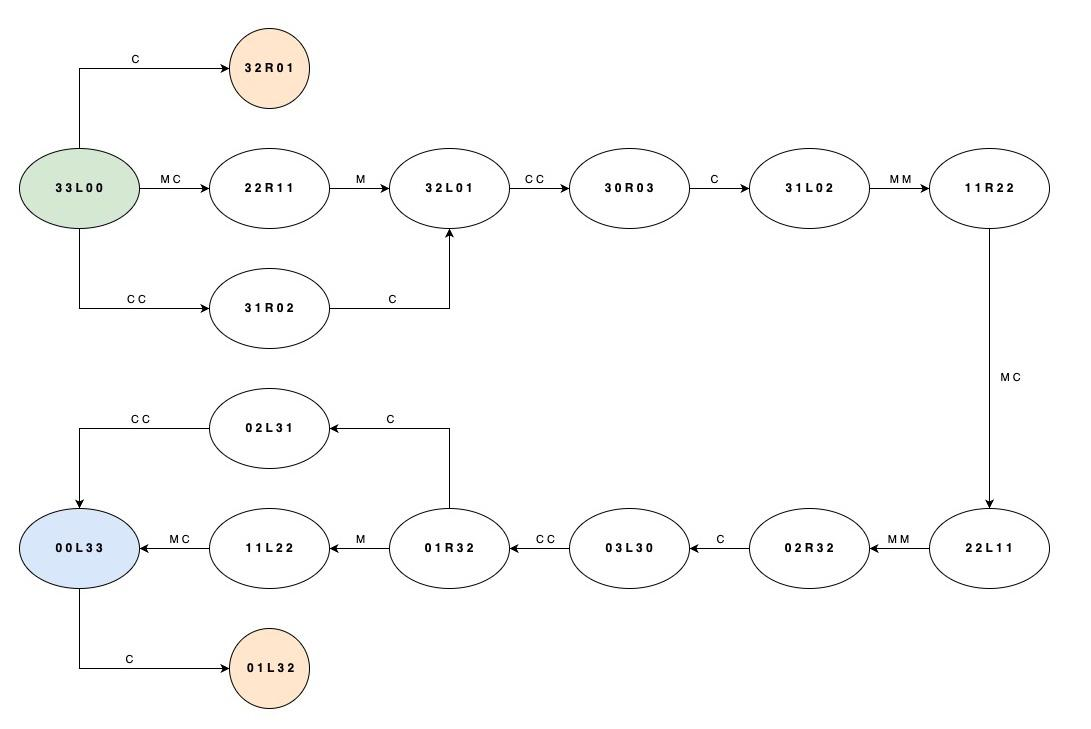

#### B)

- En este diagrama, el estado inicial está representado con el color verde y el estado final con el color azul. Adicional a esto, hay dos estados con color amarillo, los cuales son estados posibles dentro de las reglas impuestas por el ejercicio, pero no llevan a ningún lado dado a que el único movimiento legal que pueden realizar es regresar al estado anterior. Por tal motivo se muestra el estado completo del ejercicio. Por su parte el diagrama muestra los cambios de estados necesarios para poder alcanzar el estado final deseado y concuerda con los resultados obtenidos por el código.

#### C)

- Los códigos provistos anteriormente verifica si los estados han sido visitados anteriormente para evitar ejecutarlos repetidamente. Esto es una buena práctica dado a que se utiliza para asegurar que el código no entre en un bucle infinito repitiendo acciones previas.

#### D)

- A pesar de que el espacio de estados es simple, las personas pueden enfrentar dificultades al intentar resolverlo debido al enunciado. Al encontrarse en el estado inicial, es probable que las personas sobreanalicen la solución y realicen movimientos innecesarios que los devuelvan a estados previos. Aunque no caigan en un bucle infinito, podrían dar más pasos de los necesarios para alcanzar el estado final al repetir movimientos anteriores.

#### Análisis

- En la comparación entre los algoritmos de búsqueda en anchura (BFS) y en profundidad (DFS), se observa que BFS tiende a encontrar la solución óptima en menos pasos que DFS. Esto se debe a que BFS explora todos los nodos a una profundidad determinada antes de pasar a la siguiente profundidad, lo que garantiza que encuentre la solución más corta en términos de pasos. Por otro lado, DFS puede encontrar una solución más rápidamente si esta se encuentra en una rama más profunda del árbol de búsqueda, pero no garantiza que sea la solución óptima en términos de pasos.

# Conclusión

- En resumen, al comparar los algoritmos de búsqueda en anchura (BFS) y en profundidad (DFS), se evidencia que BFS suele encontrar la solución óptima en menos pasos que DFS. Esto se debe a que BFS explora todos los nodos a una profundidad determinada antes de avanzar, asegurando así la ruta más corta en términos de pasos. Por otro lado, DFS puede ser más rápido si la solución está en una rama más profunda, pero no garantiza la optimización en términos de pasos.

- Además, al contrastar A* y BFS, se observa que A* destaca por su eficiencia en el tiempo de ejecución, especialmente en entornos amplios con muchos puntos de estado. Aunque BFS logra encontrar la solución en ambos casos, su tiempo de ejecución es considerablemente mayor que el de A*.

- Adicional a esto, la búsqueda de estados impacta la ejecución de los algoritmos dado a que los hace más rápidos al no repetir acciones que fueron tomadas previamente y a su vez evita iteraciones infinitas.

- En conclusión, la selección del algoritmo adecuado depende de diversos factores como la estructura del entorno y la prioridad de encontrar la solución óptima en términos de pasos o de tiempo. En general, A* sobresale por su rapidez, mientras que BFS asegura la solución más breve en términos de pasos. DFS puede ser útil cuando el tiempo es crítico y la solución óptima no es prioritaria.

# Distribución de trabajo

- Jiovaniel Soto - Redacción de informe y elaboración del ejercicio de los planos con obstáculos geométricos. Ayudó con la ideología del ejercicio de misioneros vs. caníbales y analizó resultados.

- Juan Fontánez - Redacción de la presentación para el video y elaboración del ejercicio de misioneros vs caníbales. Ayudó con la ideología del ejercicio de los planos con obstáculos geométricos y analizó resultados.

- Emmanuel Morales - Brindó información para las respuestas teóricas del problema de misioneros vs caníbales y brindó infromación para el contexto de la conclusión.

# Referencias

- [1] “DFS vs BFS,” Encora. https://www.encora.com/es/blog/dfs-vs-bfs
- [2]“Algoritmo A estrellas (A*),” Tecnologia educativa UNAN - NANAGUA, Jun. 13, 2019. https://aeia.home.blog/algoritmo-a-estrellas-a/
- [3] “2.3.1 Hill-Climbing,” ccc.inaoep.mx. 
https://ccc.inaoep.mx/~emorales/Cursos/Busqueda/node23.html#:~:text=Hill%2Dclimbing%20es%20una%20estrategia
- [4] “Punto | Aprendiendo sobre Geometría Descriptiva en el arte,” www.iered.org. http://www.iered.org/archivos/Proyecto_coKREA/REAfinales2014/GeometriaDescriptivaArte_LadyCastro/punto.html#:~:text=El%20punto%20es%20una%20figura
- [5] “Vértice,” Economipedia. https://economipedia.com/definiciones/vertice.html
- [6]“Significado de Plano,” Significados. https://www.significados.com/plano/
- [7]“Polígono - Concepto, nombres, elementos, tipos y medidas,” Concepto. https://concepto.de/poligono/
- [8] “Definición de línea recta — Definicion.de,” Definición.de. https://definicion.de/linea-recta/
- [9] Berkeley.edu, 2024. https://aima.cs.berkeley.edu/lisp/search/domains/cannibals.lisp
- [10] “The Missionaries and Cannibals Problem,” www.aiai.ed.ac.uk. https://www.aiai.ed.ac.uk/~gwickler/missionaries.html